In [1]:
import numpy as np
import cv2

In [2]:
from cv2 import imread, CascadeClassifier, imshow, waitKey, destroyAllWindows, rectangle

#### For the First Test Image

In [3]:
# load the photograph
pixels = imread('test1.jpg')

In [4]:
pixels

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       ...,

       [[112, 123, 145],
        [124, 135, 157],
        [133, 141, 164],
        ...,
        [ 97, 169, 241],
        [ 98, 167, 240],
        [ 96, 168, 240]],

       [[146, 158, 186],
        [151, 163, 191],
        [148, 160, 188],
        ...,
        [ 99, 170, 238],
        [ 99, 168, 238],
        [ 98, 168, 238]],

       [[143, 153, 183],
        [145, 155, 185],
        [139, 149, 179],
        ...,
        [ 99, 169, 236],
        [101, 168, 237],
        [ 99, 168, 237]]

In [5]:
pixels.shape

(427, 640, 3)

In [6]:
# load the pre-trained model
classifier = CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
# perform the face detection
bboxes = classifier.detectMultiScale(pixels) 

In [8]:
# print bounding box for each face
for box in bboxes:
    print(box)

[363 104  97  97]
[173  74 108 108]


In [12]:
# print bounding box for each detected face
for box in bboxes:
    # extract 
    x, y, width, height = box
    x2, y2 = x+width, y+height
    # draw a rectangle over the pixels for each detected face
    rectangle(pixels, (x,y), (x2,y2), (0,0,255), 1)

# show the image
imshow(winname='Face Detection', mat=pixels)

# keep the window open until we press a key
waitKey(delay=0)  # delay in milliseconds, except 0 which is a special value that means "forever"

# destroy all windows
destroyAllWindows()

In [13]:
bboxes

array([[363, 104,  97,  97],
       [173,  74, 108, 108]])

In [14]:
type(bboxes)

numpy.ndarray

#### For the Second Test Image

In [3]:
pixels_2 = imread(filename='test2.jpg')

In [4]:
pixels_2.shape

(486, 640, 3)

In [6]:
# Just taking a peek the image before drawing any bounding boxes on it
imshow(winname="Test Image-2", mat=pixels_2)
waitKey(0)
destroyAllWindows()

In [17]:
bboxes_2 = classifier.detectMultiScale(pixels_2, scaleFactor=1.1, minNeighbors=3)

bboxes_2

array([[451, 262,  40,  40],
       [208, 264,  46,  46],
       [153, 148,  42,  42],
       [253, 145,  46,  46],
       [ 97, 268,  49,  49],
       [316, 270,  44,  44],
       [315, 249,  50,  50],
       [258,  18,  65,  65],
       [335,  29,  35,  35],
       [407, 160,  28,  28],
       [128,  30,  40,  40],
       [219,  40,  42,  42],
       [366, 156,  43,  43],
       [ 64, 152,  36,  36],
       [427,  48,  38,  38],
       [504, 155,  41,  41]])

In [24]:
print("The shape of bboxes_2:", bboxes_2.shape)
print("There are", bboxes_2.shape[0], "faces detected in the second image.")    

The shape of bboxes_2: (16, 4)
There are 16 faces detected in the second image.


In [25]:
for box in bboxes_2:
    print(box)

[451 262  40  40]
[208 264  46  46]
[153 148  42  42]
[253 145  46  46]
[ 97 268  49  49]
[316 270  44  44]
[315 249  50  50]
[258  18  65  65]
[335  29  35  35]
[407 160  28  28]
[128  30  40  40]
[219  40  42  42]
[366 156  43  43]
[ 64 152  36  36]
[427  48  38  38]
[504 155  41  41]


In [29]:
# print bounding box for each detected face
for box in bboxes_2:
    # extract 
    x, y, width, height = box
    x2, y2 = x+width, y+height
    # draw a rectangle over the pixels for each detected face
    rectangle(pixels_2, (x,y), (x2,y2), (0,0,255), 1)

# show the image
imshow(winname='Face Detection', mat=pixels_2)

# keep the window open until we press a key
waitKey(delay=0)  # delay in milliseconds, except 0 which is a special value that means "forever"

# destroy all windows
destroyAllWindows()

In [56]:
bboxes_2_changed = classifier.detectMultiScale(pixels_2, scaleFactor=1.16, minNeighbors=8)

bboxes_2_changed.shape

(6, 4)

In [57]:
for box in bboxes_2_changed:
    print(box)

[207 262  47  47]
[ 98 269  45  45]
[313 267  47  47]
[218  39  45  45]
[429  48  37  37]
[366 155  43  43]


In [58]:
# print bounding box for each detected face
for box in bboxes_2_changed:
    # extract 
    x, y, width, height = box
    x2, y2 = x+width, y+height
    # draw a rectangle over the pixels for each detected face
    rectangle(pixels_2, (x,y), (x2,y2), (0,0,255), 1)

# show the image
imshow(winname='Face Detection', mat=pixels_2)

# keep the window open until we press a key
waitKey(delay=0)  # delay in milliseconds, except 0 which is a special value that means "forever"

# destroy all windows
destroyAllWindows()

In [24]:
def faceDetection(image_path, scale_factor, min_neighbors):

    # Taking a trial peek at the image before drawing any bounding boxes on it
    pixs = imread(image_path)
    imshow(winname="Trial look", mat=pixs)
    waitKey(0)
    destroyAllWindows()

    # Using the pre-trained classifier in OpenCV
    clf = CascadeClassifier('haarcascade_frontalface_default.xml')
    b_boxes = clf.detectMultiScale(pixs, scaleFactor=scale_factor, minNeighbors=min_neighbors)

    # print bounding box for each detected face
    for box in b_boxes:
        print(box)
        # extract 
        x, y, width, height = box
        x2, y2 = x+width, y+height
        # draw a rectangle over the pixels for each detected face
        rectangle(pixs, (x,y), (x2,y2), (0,0,255), 1)   # This rectangle is imported from OpenCV

    print("\nNumber of bounding boxes:", b_boxes.shape[0])
    
    # show the image
    imshow(winname='Face Detection', mat=pixs)

    # keep the window open until we press a key
    waitKey(delay=0)  # delay in milliseconds, except 0 which is a special value that means "forever"

    # destroy all windows
    destroyAllWindows()

In [13]:
faceDetection('test1.jpg', 1.08, 8)

[359 101 105 105]
[173  74 109 109]


In [14]:
faceDetection('test2.jpg', 1.08, 8)

[255 146  43  43]
[154 149  41  41]
[259  18  59  59]
[333  28  38  38]
[128  30  40  40]
[221  41  39  39]
[366 156  43  43]
[428  48  38  38]
[451 262  40  40]
[208 264  45  45]
[ 97 268  48  48]
[317 270  42  42]


In [15]:
faceDetection('test2.jpg', 1.09, 8)

[451 263  40  40]
[208 264  44  44]
[ 96 269  46  46]
[316 270  44  44]
[255 147  43  43]
[336  30  34  34]
[220  41  40  40]
[129  31  39  39]
[366 156  43  43]
[428  48  38  38]


In [21]:
faceDetection('test2.jpg', 1.04, 8)

[254 147  43  43]
[ 60 149  41  41]
[154 150  40  40]
[258  17  64  64]
[334  28  36  36]
[220  40  42  42]
[128  30  41  41]
[366 156  44  44]
[505 156  39  39]
[428  47  39  39]
[451 262  41  41]
[208 264  46  46]
[ 96 267  50  50]
[316 269  44  44]


In [23]:
faceDetection('test2.jpg', 1.0399, 8)

[450 262  41  41]
[208 264  46  46]
[ 96 267  49  49]
[254 147  43  43]
[316 269  44  44]
[153 149  42  42]
[258  17  63  63]
[334  28  37  37]
[127  30  41  41]
[219  40  42  42]
[365 155  44  44]
[ 60 149  42  42]
[428  47  39  39]
[504 155  40  40]
(14, 4)


In [51]:
faceDetection('test2.jpg', 1.05, 8)

[453 263  38  38]
[208 264  46  46]
[ 97 267  50  50]
[316 269  44  44]
[254 146  44  44]
[336  30  33  33]
[128  30  40  40]
[219  40  42  42]
[428  48  39  39]
[366 156  44  44]

Number of bounding boxes: 10


### Implementing a Cascaded Convolutional Neural Network (MTCNN)

In [4]:
!pip install mtcnn

  Using cached mtcnn-0.1.1-py3-none-any.whl (2.3 MB)


In [5]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [54]:
filename = 'test1.jpg'
# load image from the file
img = imread(filename=filename)
pixs = plt.imread(fname=filename)

In [55]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [232, 230, 230],
        [232, 230, 230],
        [232, 230, 230]],

       ...,

       [[112, 123, 145],
        [124, 135, 157],
        [133, 141, 164],
        ...,
        [ 97, 169, 241],
        [ 98, 167, 240],
        [ 96, 168, 240]],

       [[146, 158, 186],
        [151, 163, 191],
        [148, 160, 188],
        ...,
        [ 99, 170, 238],
        [ 99, 168, 238],
        [ 98, 168, 238]],

       [[143, 153, 183],
        [145, 155, 185],
        [139, 149, 179],
        ...,
        [ 99, 169, 236],
        [101, 168, 237],
        [ 99, 168, 237]]

In [56]:
pixs

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [230, 230, 232],
        [230, 230, 232],
        [230, 230, 232]],

       ...,

       [[145, 123, 112],
        [157, 135, 124],
        [164, 141, 133],
        ...,
        [241, 169,  97],
        [240, 167,  98],
        [240, 168,  96]],

       [[186, 158, 146],
        [191, 163, 151],
        [188, 160, 148],
        ...,
        [238, 170,  99],
        [238, 168,  99],
        [238, 168,  98]],

       [[183, 153, 143],
        [185, 155, 145],
        [179, 149, 139],
        ...,
        [236, 169,  99],
        [237, 168, 101],
        [237, 168,  99]]

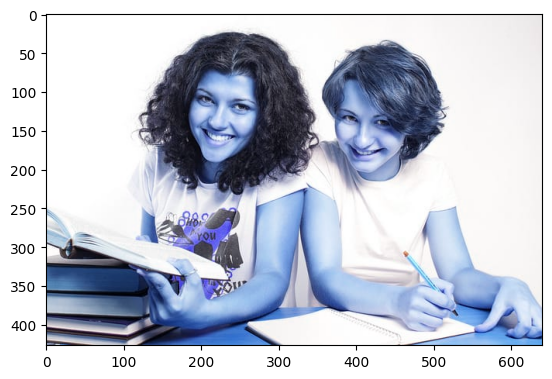

In [57]:
plt.imshow(img); plt.show()    # The img is the opencv read image (defaults to BGR format)

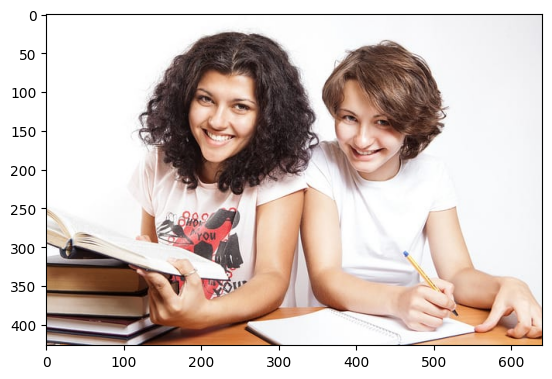

In [58]:
plt.imshow(pixs)   # The pix is the pyplot read image (defaults to the RGB format I think)
plt.show()

In [60]:
# create the detector using the default weights
detector = MTCNN()

# detect faces in the image
faces = detector.detect_faces(img=pixs)

for face in faces:
    print(face)

1/1 [==============================] - 0s 182ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


In [61]:
print(faces)

[{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}, {'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}]


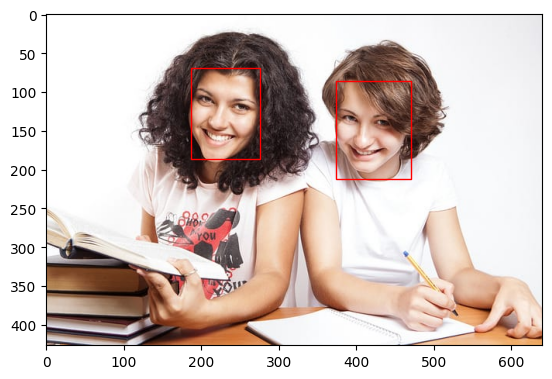

In [65]:
from matplotlib.patches import Rectangle

plt.imshow(pixs)
ax = plt.gca()

for face in faces:
    # get coordinates
    x, y, width, height = face['box']

    # create the shape
    r= Rectangle(xy=(x, y), width=width, height=height, fill=False, color='red')

    # draw the box 
    ax.add_patch(r)

# show the plot
plt.show()

In [29]:
def draw_image_with_bounding_boxes(image_path, result_faces_list):
    
    # show the image
    data = plt.imread(image_path)
    plt.imshow(data)

    ax = plt.gca()

    for result in result_faces_list:
        # get coordinates
        x, y, width, height = result['box']

        # create the shape
        r = Rectangle(xy=(x, y), width=width, height=height, fill=False, color='red')
        #r = rectangle(data, (x,y), (x+width), (y+height), (0,0,255), 1) # from OpenCV

        # draw the box 
        ax.add_patch(r)

    plt.title("Face Detection Using MTCNN")
    # show the plot
    plt.show()

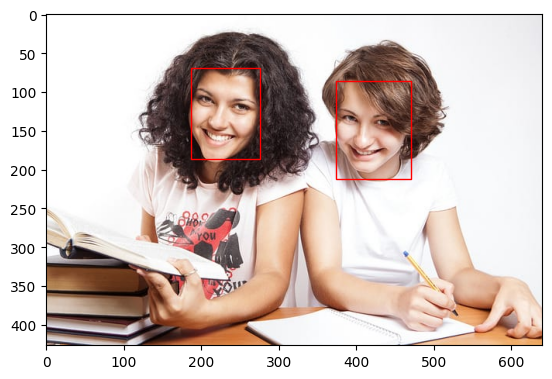

In [73]:
draw_image_with_bounding_boxes(image_path='test1.jpg', result_faces_list=faces)

In [32]:
def faceDetection_MTCNN(filename):

    # load image from the file
    image = plt.imread(fname=filename)
    image_opencv = imread(filename=filename)

    # Taking a peek at the image before drawing the bounding boxes on it
    imshow(winname="Trial Peek", mat=image_opencv)
    waitKey(0)
    destroyAllWindows()

    # create the detector using the default weights
    detector = MTCNN()

    # detect faces in the image
    faces_detected = detector.detect_faces(img=image)

    # print the results obtained
    for face in faces_detected:
        print(face)
    print("Number of faces detected:", len(faces_detected))

    # draw the bounding boxes in the image
    draw_image_with_bounding_boxes(image_path=filename, result_faces_list=faces_detected)
    

1/1 [==============================] - 0s 173ms/step
{'box': [373, 85, 97, 127], 'confidence': 0.9999923706054688, 'keypoints': {'left_eye': (391, 133), 'right_eye': (437, 141), 'nose': (406, 172), 'mouth_left': (389, 176), 'mouth_right': (436, 182)}}
{'box': [186, 69, 89, 117], 'confidence': 0.999233603477478, 'keypoints': {'left_eye': (208, 109), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


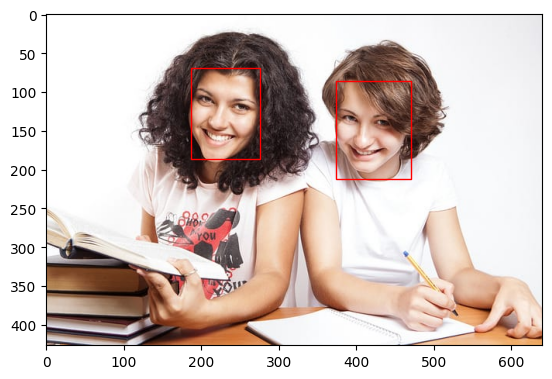

In [83]:
faceDetection_MTCNN(filename='test1.jpg')

3/3 [==============================] - 0s 26ms/step
{'box': [319, 268, 33, 42], 'confidence': 0.9999657869338989, 'keypoints': {'left_eye': (330, 286), 'right_eye': (346, 285), 'nose': (338, 296), 'mouth_left': (331, 301), 'mouth_right': (345, 301)}}
{'box': [226, 40, 31, 40], 'confidence': 0.9999130964279175, 'keypoints': {'left_eye': (233, 56), 'right_eye': (248, 55), 'nose': (241, 63), 'mouth_left': (233, 70), 'mouth_right': (249, 69)}}
{'box': [63, 149, 32, 40], 'confidence': 0.9998407363891602, 'keypoints': {'left_eye': (74, 163), 'right_eye': (88, 164), 'nose': (82, 171), 'mouth_left': (73, 177), 'mouth_right': (87, 179)}}
{'box': [432, 44, 34, 46], 'confidence': 0.9998251795768738, 'keypoints': {'left_eye': (439, 63), 'right_eye': (454, 59), 'nose': (447, 70), 'mouth_left': (443, 78), 'mouth_right': (457, 74)}}
{'box': [372, 156, 33, 43], 'confidence': 0.9997979998588562, 'keypoints': {'left_eye': (379, 173), 'right_eye': (394, 171), 'nose': (387, 181), 'mouth_left': (382, 188),

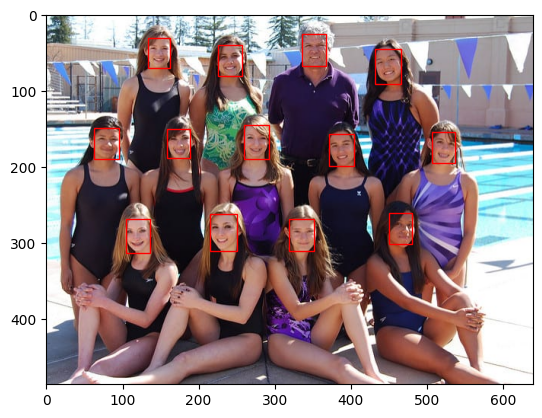

In [84]:
faceDetection_MTCNN(filename='test2.jpg')

##### Playing around with this MTCNN

In [10]:
from matplotlib.patches import Rectangle

1/1 [==============================] - 0s 21ms/step


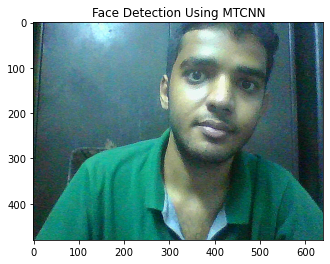

In [28]:
faceDetection_MTCNN("my_face.png")   # My face (for some reason, this doesn't work for .png images, but only for .jpg or .jpeg images)

1/1 [==============================] - 0s 206ms/step
{'box': [373, 83, 100, 129], 'confidence': 0.9998095631599426, 'keypoints': {'left_eye': (392, 132), 'right_eye': (436, 139), 'nose': (403, 171), 'mouth_left': (390, 171), 'mouth_right': (438, 177)}}
{'box': [185, 68, 91, 118], 'confidence': 0.9993304014205933, 'keypoints': {'left_eye': (208, 110), 'right_eye': (252, 119), 'nose': (220, 143), 'mouth_left': (200, 148), 'mouth_right': (245, 159)}}


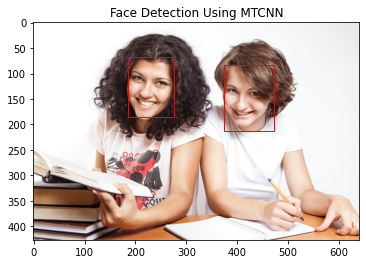

In [11]:
faceDetection_MTCNN("test1.jpg")

1/1 [==============================] - 0s 185ms/step
{'box': [485, 127, 377, 517], 'confidence': 0.9999521970748901, 'keypoints': {'left_eye': (595, 327), 'right_eye': (782, 353), 'nose': (676, 438), 'mouth_left': (570, 495), 'mouth_right': (758, 518)}}


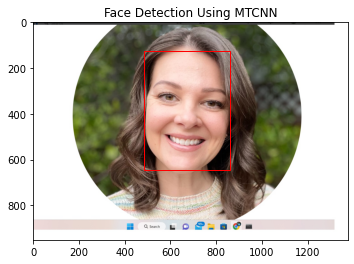

In [13]:
faceDetection_MTCNN("Anna_Dizack.jpg")

1/1 [==============================] - 0s 24ms/step


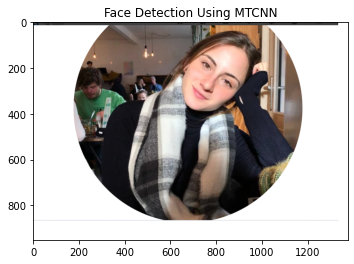

In [14]:
faceDetection_MTCNN("May_Hamri.png")

1/1 [==============================] - 0s 297ms/step
{'box': [656, 104, 255, 276], 'confidence': 0.9999703168869019, 'keypoints': {'left_eye': (765, 188), 'right_eye': (847, 262), 'nose': (768, 274), 'mouth_left': (696, 270), 'mouth_right': (770, 331)}}
{'box': [224, 260, 63, 70], 'confidence': 0.9990037083625793, 'keypoints': {'left_eye': (237, 288), 'right_eye': (264, 286), 'nose': (248, 306), 'mouth_left': (243, 316), 'mouth_right': (266, 314)}}
{'box': [457, 313, 33, 41], 'confidence': 0.997227132320404, 'keypoints': {'left_eye': (468, 332), 'right_eye': (483, 331), 'nose': (476, 340), 'mouth_left': (470, 347), 'mouth_right': (482, 346)}}


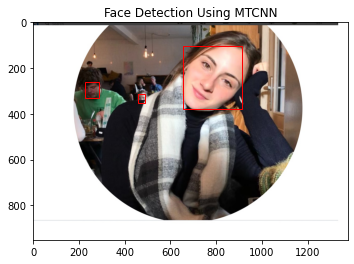

In [15]:
faceDetection_MTCNN("May_Hamri.jpg")

In [17]:
Rectangle??

In [18]:
im = imread("May_Hamri.png")

In [19]:
im

array([[[ 49,  26,   3],
        [ 49,  26,   3],
        [ 49,  26,   3],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 49,  26,   3],
        [ 49,  26,   3],
        [ 49,  26,   3],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 60,  54,  49],
        [ 60,  54,  49],
        [ 60,  54,  49],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [22]:
imshow("May Hamri PNG Image", im)
waitKey(0)
destroyAllWindows()

In [21]:
imshow??

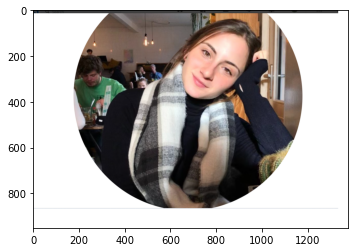

In [24]:
im_plt = plt.imread("May_Hamri.png")

# This will show it in BGR format by default
#imshow("May Hamri PNG Image", im_plt)
#waitKey(0)
#destroyAllWindows()

# This will show it in RGB conveniently
plt.imshow(im_plt)

In [25]:
rectangle??

1/1 [==============================] - 0s 217ms/step
{'box': [79, 44, 118, 151], 'confidence': 0.9999912977218628, 'keypoints': {'left_eye': (118, 112), 'right_eye': (172, 104), 'nose': (158, 133), 'mouth_left': (138, 165), 'mouth_right': (179, 159)}}


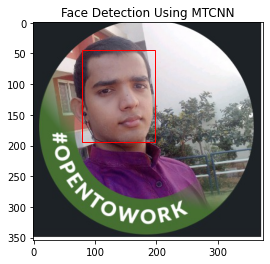

In [31]:
faceDetection_MTCNN("Me.jpg")

In [35]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:default !important; }</style>")) # you can change the default to 90% or 100% to extpand